# Qubit Rotation Demo

This notebook demonstrates a single-qubit rotation around the X-axis using PennyLane.

- Define a parameterized quantum circuit.
- Vary the rotation parameter.
- Measure the expectation value of the PauliZ operator.
- Plot the resulting expectation values vs. rotation angle.

References:
- [PennyLane Quantum Circuits](https://docs.pennylane.ai/en/stable/introduction/circuits.html)

In [1]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define a quantum device
dev = qml.device("default.qubit", wires=1)

# Define a parameterized quantum circuit
@qml.qnode(dev)
def circuit(theta):
    qml.RX(theta, wires=0)
    return qml.expval(qml.PauliZ(0))

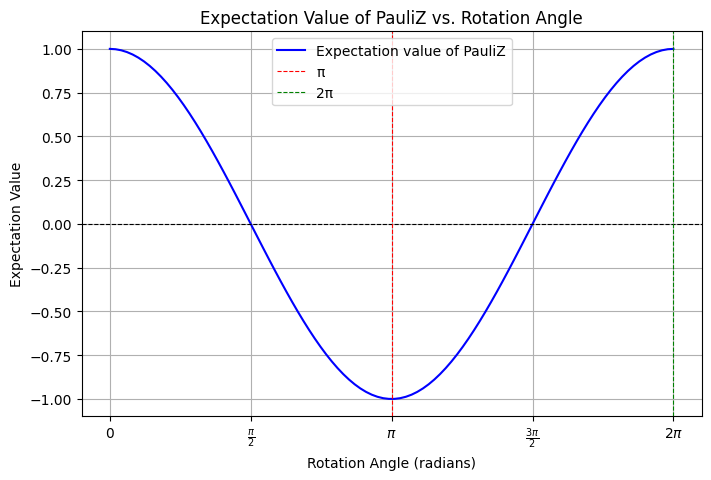

In [3]:
# Parameter sweep
thetas = np.linspace(0, 2 * np.pi, 100)
expectations = [circuit(theta) for theta in thetas]

# Plotting the results
plt.figure(figsize=(8, 5))
plt.plot(thetas, expectations, label='Expectation value of PauliZ', color='blue')
plt.title('Expectation Value of PauliZ vs. Rotation Angle')
plt.xlabel('Rotation Angle (radians)')
plt.ylabel('Expectation Value')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.axvline(np.pi, color='red', linestyle='--', linewidth=0.8, label='π')
plt.axvline(2 * np.pi, color='green', linestyle='--', linewidth=0.8, label='2π')
# Customize x-axis ticks to show multiples of π
plt.xticks(
    [0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi],
    ['0', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$']
)
plt.legend()
plt.grid()

This simple example demonstrates the basic behavior of a parameterized single-qubit gate and forms the foundation for variational quantum algorithms.

- The expectation value of PauliZ varies as cos(θ). 
- As θ increases from 0 to 2π, the qubit state rotates around the X-axis on the Bloch sphere. 